<img src="logosimbolo1.gif" width="180" height="180" align="left"/>

<img src="logo.svg" width="200" height="460" align="right"/>

<font color='orange' size=6 align='center'><p style='text-align: center;'>**Curso Precongreso (1-CICB): Python en Ciencias Biomédicas**\
<font color=cian size=5>**Enrique Mejía Ospino, emejia@uis.edu.co**\
<font color=cian size=5>         **Universidad Industrial de Santander**

<font color=navy size=6 align='center'><p style='text-align: center;'>**DIAGNÓSTICO**
    
---

**<font bold color=RoyalBlue size=4><p style='text-align: justify;'>
Las capacidades de aprendizaje automático (*ML*) de Python pueden aplicarse eficazmente en la construcción de potentes herramientas procesamiento de datos médicos con la finalidad de predecir la ocurrencia o no de una enfermedad. Estas herramientas podrán aprender de los datos clínicos de los pacientes, identificar patrones específicos y proporcionar información personalizada sobre el diagnóstico y la medicación con una precisión muy alta. Esto incluye todo tipo de análisis clínico e incluyendo electrocardiogramas, ecografías, resonancias magnéticas y tomografías computerizadas.
Con herramientas de aprendizaje automático basadas en Python, los médicos pueden combinar estos datos en un único resultado de diagnóstico con una estrategia de tratamiento más eficaz y precisa.**

---

<font color='navy' size=4><p style='text-align: justify;'>**Vamos a desarrollar un modelo de predicción supervizado (Clasificación supervizada), utilizando dos herremientas muy conocidas para este proposito; (`KNN, k vecinos más cercanos`) y (`SVC, Clasificador a partir de vectores de soporte`).  Estas herramientas están incluídas en uno de los modulos de Python más importantes para el desarrollo de modelos de aprendizaje automatizado, `scikit-learn (sklearn)`.  Si desea tener más información de este modulo visite la pagina de documentación de scikit-learn [aquí](https://scikit-learn.org/stable/index.html)**

In [33]:
import numpy as np
# De sklearn utilizaremos las funciones para desarrollar el modelo y evaluarlo con las métricas correspondientes
from sklearn import preprocessing
from sklearn.model_selection import cross_validate # difference from course
from sklearn.neighbors import KNeighborsClassifier # K-Vecinos cercanos
from sklearn.svm import SVC # Vector de soporte clasificador (SVM)
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score # Métricas
from pandas.plotting import scatter_matrix # Visualización con pandas
import matplotlib.pyplot as plt # Visualización de resultados
import pandas as pd # Manejo de los datos

<font color='navy' size=4><p style='text-align: justify;'>**Utilizaremos datos extraídos de la [base de datos para *ML*](https://archive-beta.ics.uci.edu/ml/datasets) de la Universidad de California en Irvine, en este caso en particular, datos clínicos de pacientes con cáncer de mama.**

In [39]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal-adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
df = pd.read_csv(url, names=names) #importar los datos

In [35]:
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal-adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<font color='navy' size=4><p style='text-align: justify;'>**Hacemos un poco de pre-procesamiento de los datos.**

In [40]:
df.replace('?', -99999, inplace=True) # Vamos a sustituir los datos faltantes por -99999 que no´serán leídos en Python 
print(df.axes) # Imprimimos los indices (nombres de las columnas)
df.drop(['id'], 1, inplace=True) # Removemos la columna con los id
print(df.shape) # imprimimos el tamaño

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal-adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


<font color='navy' size=4><p style='text-align: justify;'>**Rápida inspección de los datos.**

In [41]:
print("primera fila de datos")
print(df.loc[0])  # Imprimimos la primera fila de los datos
#print("Última fila de datos")
#print(df.loc[698])  # podemo ver también la última fila
print(df.describe()) # Estadística de los básica de cada característica

primera fila de datos
clump_thickness                5
uniform_cell_size              1
uniform_cell_shape             1
marginal-adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitosis                        1
class                          2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal-adhesion  single_epithe

<font color='navy' size=4><p style='text-align: justify;'>**Rápida Visualización de las características.**

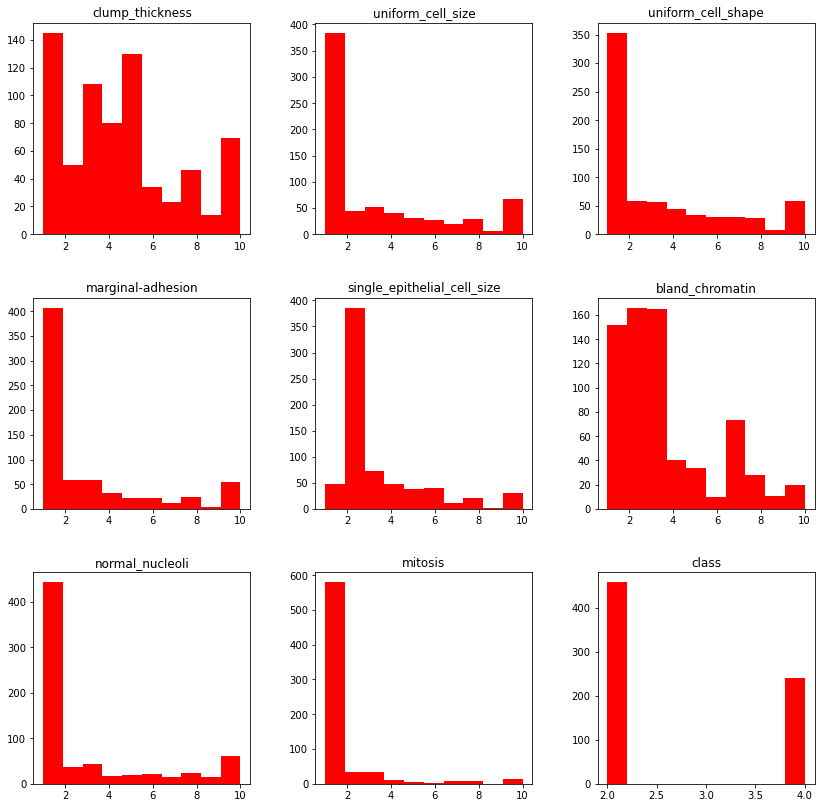

In [47]:
df.hist(figsize = (14,14), color='r', grid=False)
plt.show()       

In [46]:
df.corr() # Correlación entre las variables 

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal-adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitosis,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal-adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitosis,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<font color='navy' size=4><p style='text-align: justify;'>**Ahora separaremos las varibles predictoras de la variable objetivo (en este caso la variable clase) que determina si las células son de tipo benignas (2) a malignas (4). Adicionalemnte se hace un muestreo para separar los datos en un set de entrenamiento y otro de prueba.**

In [61]:
X = np.array(df.drop(['class'], 1)) # Eliminamos de aquí la columna de las clases
y = np.array(df['class']) # Aquí almacenamos solo la clase y así separmos los datos en X e y           

# Separación de los datos en set de entrenamiento y set de prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.8, random_state = 4, shuffle = True)

In [62]:
# Definimos los modelos para entrenar
models = [] # crearemos una lista vaciía que luego llenaremos con los dos modelos que vamos ejecutar
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5))) # Adicionamos el primer modelo, KNN, a la lista utilizando 5 vecinos
models.append(('SVN', SVC(gamma='auto'))) # Adicionamos el segundo modelo, SVC, utilizando un valor de gamma automático
for name, model in models:
    model.fit(X_train, y_train)   # Ejecutamos cada modelo con los datos de entrenamiento
    predictions = model.predict(X_test) # Hacemos las predicciones con los datos de prueba
    print(name, ':\t score = ' + str(round(accuracy_score(y_test, predictions), 2)))  # Imprimimos el nombre del modelo y la exactitud de la predicción para cada uno
    
    print(classification_report(y_test, predictions)) # Finalmente imprimimos el reporte completo de la clasificación

KNN :	 score = 0.97
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        88
           4       0.98      0.94      0.96        52

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVN :	 score = 0.96
              precision    recall  f1-score   support

           2       0.99      0.94      0.97        88
           4       0.91      0.98      0.94        52

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



<font color='navy' size=4><p style='text-align: justify;'>**Ahora, si quisieramos hacer una predicción de un paciente que no hizo parte de los datos de entrenamientos ni de prueba, solo debemos evaluar sus variables predictoras en el mismo formato en que se construyó el modelo. Veamos un ejemplo.**

In [75]:
example = np.array([[4,2,1,1,1,2,3,2,4]])

for name, model in models:
    model.fit(X_train, y_train)   # Ejecutamos cada modelo con los datos de entrenamiento
    predictions = model.predict(example) # Hacemos las predicciones con los datos de prueba
    pred = [ 'Negativo' if x == 2 else 'Positivo' for x in predictions]
    print(name, ':\t Predicción = ' + str(predictions) + ', \t' + str(pred[0]) + ' para cáncer de mama' )  # Imprimimos el nombre del modelo y la exactitud de la predicción para cada uno
   

KNN :	 Predicción = [2], 	Negativo para cáncer de mama
SVN :	 Predicción = [2], 	Negativo para cáncer de mama
